# Basic Computer Vision

In [9]:
import cv2
import numpy as np

In [10]:
cv2.__version__

'3.4.2'

## < Getting Started with Images >

### (1) Read Image

#### cv2.imread(filename, flag)

- flag
    
cv2.IMREAD_COLOR : Loads a color image. (1) 
    
cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode (0)
    

In [15]:
#img = cv2.imread("./data/opencv-4.1-feature-image.png", cv2.IMREAD_COLOR) # 경로, 플래그
img = cv2.imread("./data/opencv-4.1-feature-image.png")
# img = cv2.imread("https://opencv.org/wp-content/uploads/2019/04/opencv-4.1-feature-image.png", 1)

### (2) Display Image

#### cv2.imshow(window title, array)
Display an image in a window

#### cv2.waitKey(delay)
Waits for specified milliseconds for any keyboard event

#### cv2.destroyAllWindows()
Destroys all the windows created

In [12]:
# 서버에서는 안 돌아간다.

# cv2.imshow('image', img)
# k = cv2.waitKey(0)
# if k == 27:         # wait for ESC key to exit
#    cv2.destroyAllWindows()

#### Using Matplotlib
Matplotlib is a plotting library for Python which gives you wide variety of plotting methods.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

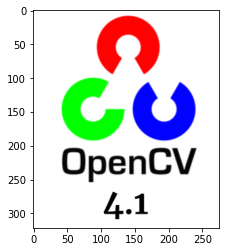

In [16]:
cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(cvt_img)
#plt.imshow(img)
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [26]:
print(cvt_img.shape)
print(cvt_img.size)
print(cvt_img.dtype)

(322, 275, 3)
265650
uint8


In [30]:
#to do

# cvt_img[y축,x축] -> output : [red, green, blue]
red_pixel = cvt_img[50,100]
green_pixel = cvt_img[150,70] 
blue_pixel = cvt_img[150,170]
white_pixel = cvt_img[10, 10]
black_pixel = cvt_img[220, 75]
print("red pixel :", red_pixel)
print("green pixel :", green_pixel)
print("blue pixel :", blue_pixel)
print("white pixel :", white_pixel)
print("black pixel :", black_pixel)

red pixel : [255   1   1]
green pixel : [ 83 255  83]
blue pixel : [  1   1 255]
white pixel : [255 255 255]
black pixel : [6 6 6]


### (3) Drawing Function

Drawing Functions have some common arguments as given below:

- img : The image where you want to draw the shapes
- color : Color of the shape. For grayscale, just pass the scalar value.
- thickness : Thickness of the line or circle etc.
- lineType : Type of line

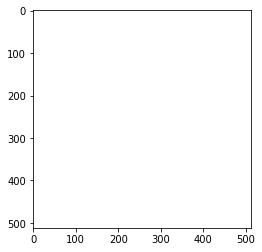

In [31]:
# 가로, 세로, 3차원, 255값을 채운다.
white_img = np.full((512, 512, 3), 255, np.uint8)
# white_img = np.zeros((512, 512, 3), np.uint8)
# white_img += 255

plt.imshow(white_img)

#### cv2.line(img, start, end, color, thickness)

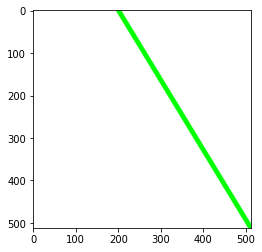

In [32]:
drawing_img = np.full((512, 512, 3), 255, np.uint8)
cv2.line(drawing_img, (200, 0), (511, 511), (0, 255, 0), 10)
plt.imshow(drawing_img)

#### cv2.rectangle(img, start, end, color, thickness)

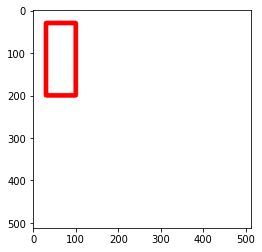

In [33]:
drawing_img = np.full((512, 512, 3), 255, np.uint8)
cv2.rectangle(drawing_img, (30, 30), (100, 200), (255, 0, 0), 10)
plt.imshow(drawing_img)

#### cv2.circle(img, center, radian, color, thickness)

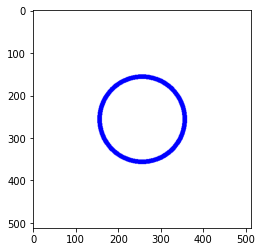

In [34]:
drawing_img = np.full((512, 512, 3), 255, np.uint8)
cv2.circle(drawing_img, (256, 256), 100, (0, 0, 255), 10)
plt.imshow(drawing_img)

#### cv2.putText(img, text, org, font, fontSacle, color)

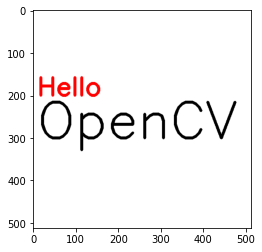

In [35]:
drawing_img = np.full((512, 512, 3), 255, np.uint8)
cv2.putText(drawing_img, 'Hello', (10,200), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0),5)
cv2.putText(drawing_img, 'OpenCV', (10,300), cv2.FONT_HERSHEY_SIMPLEX, 4, (0,0,0),5)
plt.imshow(drawing_img)

### (4) Save Image 

#### cv2.imwrite(filename, image)
Use the function cv.imwrite() to save an image

In [36]:
drawing_img = cv2.cvtColor(drawing_img, cv2.COLOR_RGB2BGR)
cv2.imwrite('HelloOpenCV.jpg', drawing_img)

True

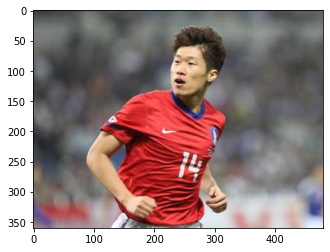

In [52]:
player_img_color = cv2.imread('./data/soccer_player.jpg', 1)
# player_img_color = cv2.imread('https://i.ytimg.com/vi/wdufu2MKz7Q/hqdefault.jpg', 1)
player_img_color = cv2.cvtColor(player_img_color, cv2.COLOR_BGR2RGB)
plt.imshow(player_img_color)

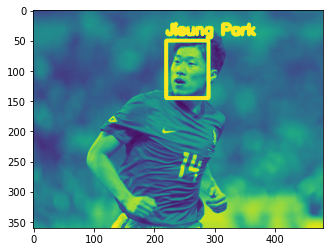

In [61]:
# <to do>
# 1. read image by grayscale
player_img = cv2.imread('./data/soccer_player.jpg', 0)
# player_img = cv2.cvtColor(player_img, cv2.COLOR_BGR2RGB)

# 2. Draw rectangle and Text around player face
cv2.rectangle(player_img, (220, 50), (290, 145), (255, 255, 255), 5)
cv2.putText(player_img, "Jisung Park",(220, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 5)
plt.imshow(player_img)
# 3. save image

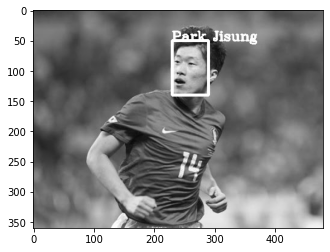

In [38]:
gray_img = cv2.imread("data/soccer_player_gray.jpg")
plt.imshow(gray_img)

## < Getting Started with Videos >

#### cv2.VideoCaputer(filename or device index)
Create a VideoCapture object to capture a video.

Device index is just the number to specify which camera.

#### cap.get(propId) 
Access some of the features of this video

In [49]:
cap = cv2.VideoCapture("./data/Megamind.avi")
# cap = cv2.VideoCapture("http://technical-recipes.com/Downloads/SAMPLE.AVI")
videoWidth = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
videoHeight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
frameCount = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)

print("width :", videoWidth)
print("height :", videoHeight)
print("frame count :", frameCount)
print("fps :", fps)

width : 720.0
height : 528.0
frame count : 270.0
fps : 23.976


#### cv2.VideoWriter(outputFile, fourcc, frame, size)
Create a VideoWriter object to write a video.

- outputFile (str) – file name 
- fourcc – Codec information. cv2.VideoWriter_fourcc()
- frame (float) – frame
- size (list) – size (ex; 640, 480)

In [50]:
fourcc =  cv2.VideoWriter_fourcc(*'DIVX')
size = (int(videoWidth/2), int(videoHeight/2))
print(size)
out = cv2.VideoWriter('output.avi', fourcc, 24, size)

(360, 264)


In [51]:
# 비디오가 열려있으면 값을 리턴받을 수 있음
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    frame = cv2.resize(frame, size)
    frame = cv2.flip(frame, 0) # 거꾸로 생김
    cv2.rectangle(frame, (30, 30), (100, 100), (255, 0, 0), 5) # 사각형이 생김
    out.write(frame)
    
cap.release()
out.release()

Can't receive frame (stream end?). Exiting ...
